# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [9]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


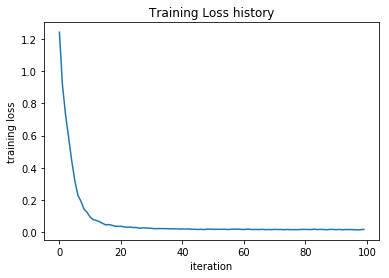

In [21]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [22]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [69]:
input_size = 32 * 32 * 3
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2500, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 2500: loss 2.305617
iteration 100 / 2500: loss 1.974558
iteration 200 / 2500: loss 1.765116
iteration 300 / 2500: loss 1.614763
iteration 400 / 2500: loss 1.716124
iteration 500 / 2500: loss 1.608888
iteration 600 / 2500: loss 1.689981
iteration 700 / 2500: loss 1.593575
iteration 800 / 2500: loss 1.627732
iteration 900 / 2500: loss 1.486927
iteration 1000 / 2500: loss 1.564473
iteration 1100 / 2500: loss 1.550653
iteration 1200 / 2500: loss 1.538833
iteration 1300 / 2500: loss 1.533516
iteration 1400 / 2500: loss 1.582868
iteration 1500 / 2500: loss 1.474519
iteration 1600 / 2500: loss 1.534358
iteration 1700 / 2500: loss 1.584247
iteration 1800 / 2500: loss 1.504150
iteration 1900 / 2500: loss 1.460222
iteration 2000 / 2500: loss 1.562056
iteration 2100 / 2500: loss 1.359899
iteration 2200 / 2500: loss 1.454719
iteration 2300 / 2500: loss 1.517576
iteration 2400 / 2500: loss 1.435761
Validation accuracy:  0.512


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

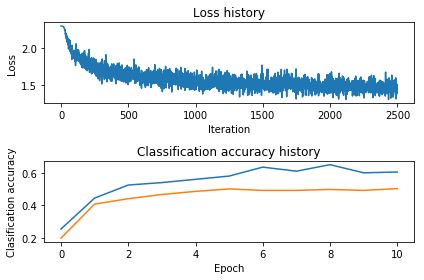

In [70]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.tight_layout()
plt.show()

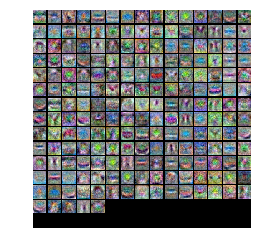

In [64]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [73]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
hidden_sizes = {100, 150, 200, 250, 300, 350, 400}
learning_rates = {1e-4, 5e-4, 7.5e-4, 1e-3, 2.5e-3, 5e-3}
best_accuracy = 0
for hidden_size in hidden_sizes:
    for lr in learning_rates:        
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=2500, batch_size=200,
                    learning_rate=1e-3, learning_rate_decay=0.95,
                    reg=0.25, verbose=True)
        # Predict on the validation set
        val_acc = (net.predict(X_val) == y_val).mean()
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_net = net
        print('Validation accuracy: ', val_acc)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 2500: loss 2.303359
iteration 100 / 2500: loss 1.938772
iteration 200 / 2500: loss 1.794224
iteration 300 / 2500: loss 1.700795
iteration 400 / 2500: loss 1.662088
iteration 500 / 2500: loss 1.532500
iteration 600 / 2500: loss 1.629800
iteration 700 / 2500: loss 1.518805
iteration 800 / 2500: loss 1.522868
iteration 900 / 2500: loss 1.482518
iteration 1000 / 2500: loss 1.560121
iteration 1100 / 2500: loss 1.497350
iteration 1200 / 2500: loss 1.405960
iteration 1300 / 2500: loss 1.471135
iteration 1400 / 2500: loss 1.435557
iteration 1500 / 2500: loss 1.459377
iteration 1600 / 2500: loss 1.463462
iteration 1700 / 2500: loss 1.467357
iteration 1800 / 2500: loss 1.443580
iteration 1900 / 2500: loss 1.336686
iteration 2000 / 2500: loss 1.341649
iteration 2100 / 2500: loss 1.426994
iteration 2200 / 2500: loss 1.358402
iteration 2300 / 2500: loss 1.434155
iteration 2400 / 2500: loss 1.418714
Validation accuracy:  0.503
iteration 0 / 2500: loss 2.303355
iteration 100 / 2500: los

iteration 1900 / 2500: loss 1.335587
iteration 2000 / 2500: loss 1.400494
iteration 2100 / 2500: loss 1.323482
iteration 2200 / 2500: loss 1.455846
iteration 2300 / 2500: loss 1.260243
iteration 2400 / 2500: loss 1.320155
Validation accuracy:  0.515
iteration 0 / 2500: loss 2.304047
iteration 100 / 2500: loss 1.846076
iteration 200 / 2500: loss 1.787195
iteration 300 / 2500: loss 1.701419
iteration 400 / 2500: loss 1.647588
iteration 500 / 2500: loss 1.554225
iteration 600 / 2500: loss 1.676796
iteration 700 / 2500: loss 1.504449
iteration 800 / 2500: loss 1.482485
iteration 900 / 2500: loss 1.440498
iteration 1000 / 2500: loss 1.626353
iteration 1100 / 2500: loss 1.483588
iteration 1200 / 2500: loss 1.391130
iteration 1300 / 2500: loss 1.406417
iteration 1400 / 2500: loss 1.564636
iteration 1500 / 2500: loss 1.405941
iteration 1600 / 2500: loss 1.382723
iteration 1700 / 2500: loss 1.354398
iteration 1800 / 2500: loss 1.274485
iteration 1900 / 2500: loss 1.369243
iteration 2000 / 2500:

iteration 1200 / 2500: loss 1.460011
iteration 1300 / 2500: loss 1.459312
iteration 1400 / 2500: loss 1.442184
iteration 1500 / 2500: loss 1.446113
iteration 1600 / 2500: loss 1.397600
iteration 1700 / 2500: loss 1.394846
iteration 1800 / 2500: loss 1.281339
iteration 1900 / 2500: loss 1.381438
iteration 2000 / 2500: loss 1.319968
iteration 2100 / 2500: loss 1.426958
iteration 2200 / 2500: loss 1.339217
iteration 2300 / 2500: loss 1.482847
iteration 2400 / 2500: loss 1.344058
Validation accuracy:  0.531
iteration 0 / 2500: loss 2.305694
iteration 100 / 2500: loss 1.791589
iteration 200 / 2500: loss 1.657712
iteration 300 / 2500: loss 1.617574
iteration 400 / 2500: loss 1.722399
iteration 500 / 2500: loss 1.593517
iteration 600 / 2500: loss 1.641450
iteration 700 / 2500: loss 1.501797
iteration 800 / 2500: loss 1.450699
iteration 900 / 2500: loss 1.403381
iteration 1000 / 2500: loss 1.524605
iteration 1100 / 2500: loss 1.433548
iteration 1200 / 2500: loss 1.248571
iteration 1300 / 2500:

iteration 500 / 2500: loss 1.557497
iteration 600 / 2500: loss 1.659570
iteration 700 / 2500: loss 1.475834
iteration 800 / 2500: loss 1.511513
iteration 900 / 2500: loss 1.563282
iteration 1000 / 2500: loss 1.581972
iteration 1100 / 2500: loss 1.363262
iteration 1200 / 2500: loss 1.451018
iteration 1300 / 2500: loss 1.356006
iteration 1400 / 2500: loss 1.510515
iteration 1500 / 2500: loss 1.510360
iteration 1600 / 2500: loss 1.382554
iteration 1700 / 2500: loss 1.355682
iteration 1800 / 2500: loss 1.411487
iteration 1900 / 2500: loss 1.444301
iteration 2000 / 2500: loss 1.326202
iteration 2100 / 2500: loss 1.524129
iteration 2200 / 2500: loss 1.478605
iteration 2300 / 2500: loss 1.333988
iteration 2400 / 2500: loss 1.367215
Validation accuracy:  0.525
iteration 0 / 2500: loss 2.303730
iteration 100 / 2500: loss 1.903762
iteration 200 / 2500: loss 1.713516
iteration 300 / 2500: loss 1.648333
iteration 400 / 2500: loss 1.643176
iteration 500 / 2500: loss 1.677570
iteration 600 / 2500: l

iteration 2400 / 2500: loss 1.473626
Validation accuracy:  0.522
iteration 0 / 2500: loss 2.304433
iteration 100 / 2500: loss 1.925423
iteration 200 / 2500: loss 1.805054
iteration 300 / 2500: loss 1.611036
iteration 400 / 2500: loss 1.628190
iteration 500 / 2500: loss 1.562385
iteration 600 / 2500: loss 1.646515
iteration 700 / 2500: loss 1.423133
iteration 800 / 2500: loss 1.573115
iteration 900 / 2500: loss 1.447565
iteration 1000 / 2500: loss 1.439743
iteration 1100 / 2500: loss 1.422076
iteration 1200 / 2500: loss 1.445782
iteration 1300 / 2500: loss 1.325606
iteration 1400 / 2500: loss 1.412452
iteration 1500 / 2500: loss 1.381881
iteration 1600 / 2500: loss 1.374617
iteration 1700 / 2500: loss 1.338293
iteration 1800 / 2500: loss 1.445654
iteration 1900 / 2500: loss 1.346595
iteration 2000 / 2500: loss 1.346865
iteration 2100 / 2500: loss 1.370006
iteration 2200 / 2500: loss 1.548559
iteration 2300 / 2500: loss 1.254626
iteration 2400 / 2500: loss 1.454505
Validation accuracy:  

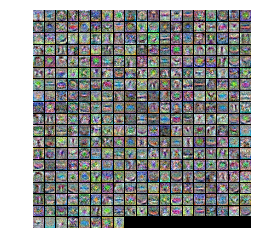

In [74]:
# visualize the weights of the best network
show_net_weights(best_net)


# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [71]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.516
